## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
#!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

In [4]:
#x = np.linspace(1, 7, 30)
#y = x**2
#y2 = x**3
#fig = plt.figure()
#ax = fig.add_axes([1, 1, 1, 1])

#ax.plot(x, y)
#ax.plot(x, y2)

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [5]:
data = np.load('D:\\code\\TOD_ID23-2\\data\\average_ratings.npy')
data

array([[ 5.        ,  5.01310274,  5.02623981, ...,  5.52281922,
         5.53729203,  5.52281922],
       [ 7.        ,  6.97074954,  7.        , ..., 10.        ,
        10.        , 10.        ],
       [ 3.        ,  2.9968611 ,  2.99372548, ...,  2.99372548,
         2.99059315,  2.98746409]])

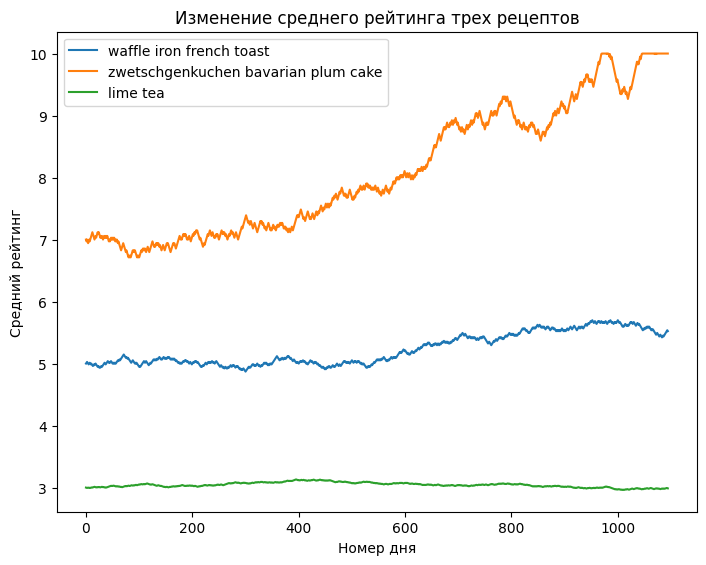

In [6]:
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(list(range(len(data[0]))), data[0], label = 'waffle iron french toast')
ax.plot(list(range(len(data[1]))), data[1], label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(list(range(len(data[2]))), data[2], label = 'lime tea')

ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.legend()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


In [7]:
import matplotlib.dates as mdates

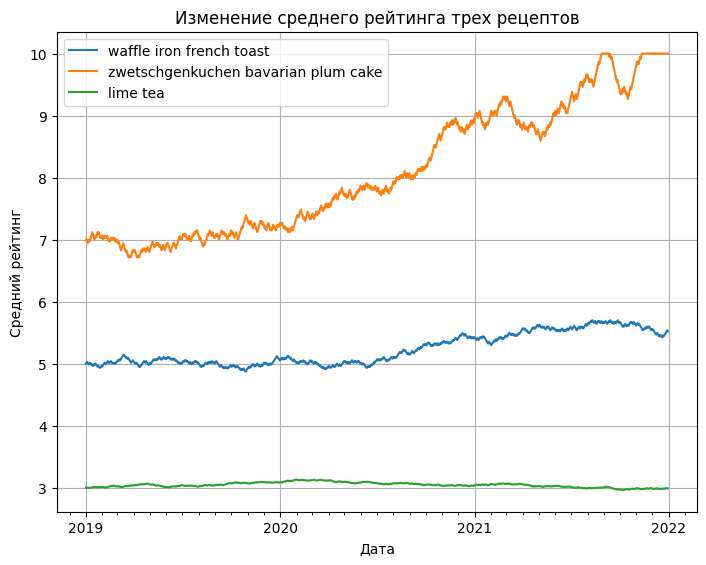

In [8]:
new_fig = plt.figure()
new_ax = new_fig.add_axes([1, 1, 1, 1])
new_x = pd.date_range('01-01-2019', '30-12-2021')

new_ax.plot(new_x, data[0], label = 'waffle iron french toast')
new_ax.plot(new_x, data[1], label = 'zwetschgenkuchen bavarian plum cake')
new_ax.plot(new_x, data[2], label = 'lime tea')

new_ax.xaxis.set_major_locator(mdates.YearLocator())
new_ax.xaxis.set_minor_locator(mdates.MonthLocator())
new_ax.grid(True)

new_ax.set_xlabel('Дата')
new_ax.set_ylabel('Средний рейтинг')
new_ax.set_title('Изменение среднего рейтинга трех рецептов')

new_ax.legend()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

C:\Users\Максим\AppData\Local\Temp\ipykernel_6360\3623888206.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axn.set_xticklabels(['', '' ,'', ''])
C:\Users\Максим\AppData\Local\Temp\ipykernel_6360\3623888206.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axn.set_xticklabels(['', '' ,'', ''])


Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

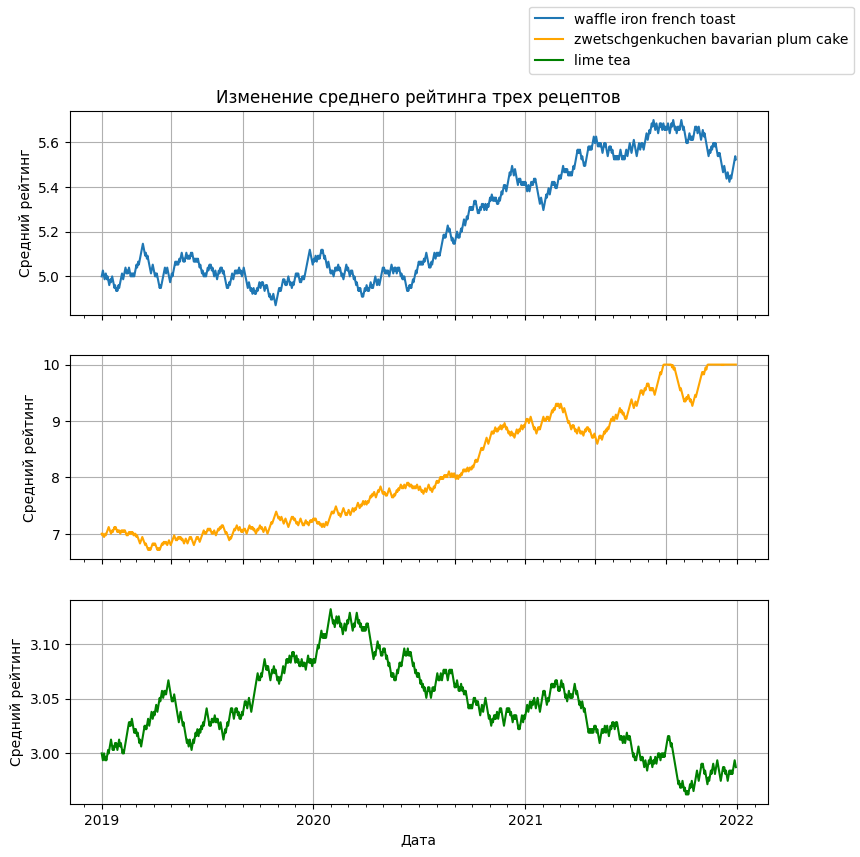

In [9]:
fig_3, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 9))
for axn in axes[:2]:
    axn.set_xticklabels(['', '' ,'', ''])
    axn.grid(True)
    axn.set_ylabel('Средний рейтинг')
    axn.xaxis.set_minor_locator(mdates.MonthLocator())

axes[0].plot(new_x, data[0], label = 'waffle iron french toast')
axes[1].plot(new_x, data[1], 'orange',label = 'zwetschgenkuchen bavarian plum cake')
axes[2].plot(new_x, data[2], 'g',label = 'lime tea')

axes[2].xaxis.set_major_locator(mdates.YearLocator())
axes[2].xaxis.set_minor_locator(mdates.MonthLocator())
axes[2].grid(True)
fig_3.legend()

axes[2].set_xlabel('Дата')
axes[2].set_ylabel('Средний рейтинг')
axes[0].set_title('Изменение среднего рейтинга трех рецептов')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


In [10]:
data_4 = np.load('data\\visitors.npy')
x_4 = list(range(1, 101))
data_4

array([2311, 2023, 1839, 1523, 1371, 1217, 1098,  958,  862,  724,  654,
        558,  526,  454,  383,  372,  356,  274,  239,  236,  214,  179,
        180,  140,  138,  112,  102,  101,   74,   81,   70,   74,   53,
         57,   52,   44,   38,   30,   37,   27,   20,   21,   16,   16,
         12,    9,   13,   10,   13,    7,    5,    8,    6,    8,    9,
          4,    3,    4,    4,    2,    2,    3,    2,    2,    2,    2,
          2,    3,    2,    2,    3,    2,    2,    2,    2,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2])

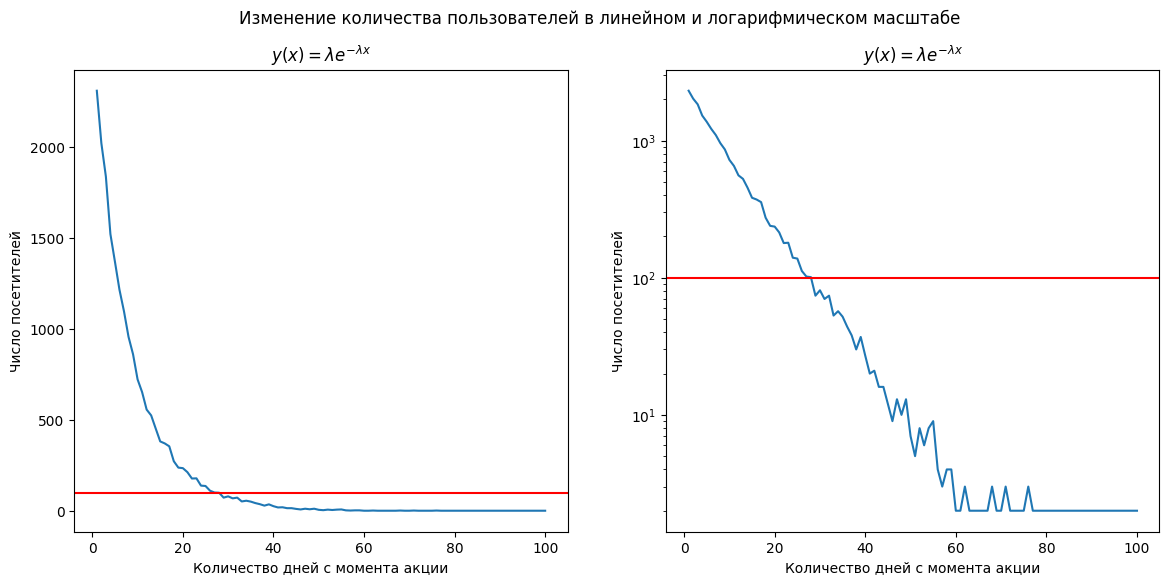

In [11]:
fig_4, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].plot(x_4, data_4)

axs[1].plot(x_4, data_4)
axs[1].set_yscale('log')

fig_4.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
for axn in axs:
    axn.axhline(y=100, color='r', label=r'$y(x)=100$')
    axn.set_xlabel('Количество дней с момента акции')
    axn.set_ylabel('Число посетителей')
    axn.set_title(r'$y(x)=\lambda e^{-\lambda x}$')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [12]:
reviews = pd.read_csv('D:\\code\\TOD_ID23-2\\data\\reviews_sample.csv')
recipes = pd.read_csv('D:\\code\\TOD_ID23-2\\data\\recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [13]:
shrt = recipes[recipes['minutes'] < 5]
mid = recipes[(recipes['minutes'] < 50)&(recipes['minutes'] > 4)]
lng = recipes[recipes['minutes'] > 49]

In [14]:
stats = pd.DataFrame({'sizes':[shrt['n_steps'].shape[0], mid['n_steps'].shape[0], lng['n_steps'].shape[0]],
                       'means':[shrt['n_steps'].mean(), mid['n_steps'].mean(), lng['n_steps'].mean()]}, index=['short', 'mid', 'long'])

stats

,sizes,means
short,675,4.990431
mid,17607,8.581922
long,11718,11.917290


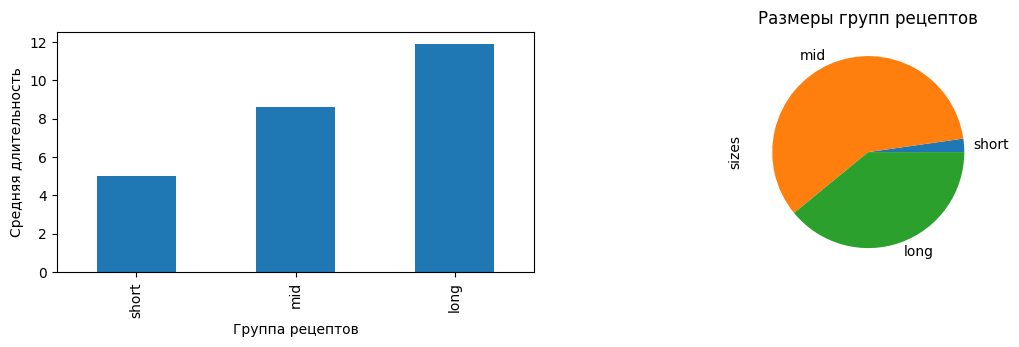

In [15]:
fig_pd = plt.figure(figsize=(12, 3))
ax0 = fig_pd.add_subplot(1, 2, 1)
stats['means'].plot(ax=ax0, kind='bar')
ax0.set_xlabel('Группа рецептов')
ax0.set_ylabel('Средняя длительность')
ax1 = fig_pd.add_subplot(1, 2, 2)
stats['sizes'].plot(ax=ax1, kind='pie', title='Размеры групп рецептов')

plt.subplots_adjust(bottom=0.1, right=1, top=0.9)

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [16]:
import datetime
reviews['date'] = reviews['date'].apply(lambda x: datetime.date(*map(int, x.split('-'))))
data_2008 = reviews[(reviews['date'] < datetime.date(2009, 1, 1))&(reviews['date'] >= datetime.date(2008, 1, 1))]
data_2009 = reviews[(reviews['date'] >= datetime.date(2009, 1, 1))&(reviews['date'] < datetime.date(2010, 1, 1))]

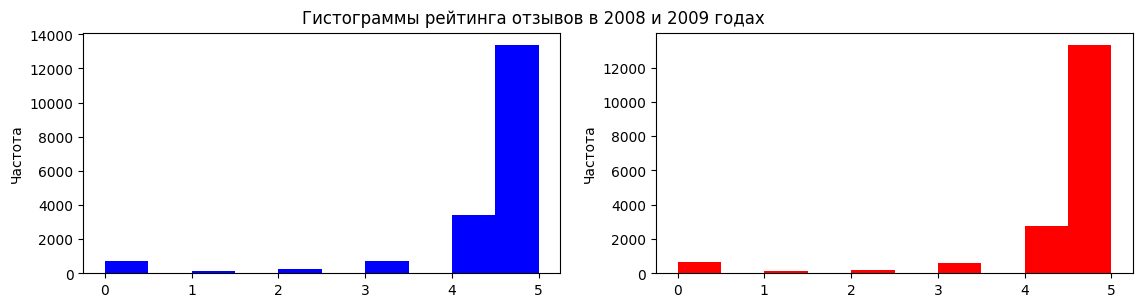

In [17]:
fig_pd_2 = plt.figure(figsize=(12, 3))
ax00 = fig_pd_2.add_subplot(1, 2, 1)
data_2008['rating'].plot(ax=ax00, kind='hist', color='blue')
ax11 = fig_pd_2.add_subplot(1, 2, 2)

data_2009['rating'].plot(ax=ax11, kind='hist', color='red')
plt.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')
ax11.set_ylabel('Частота')
ax00.set_ylabel('Частота')

plt.subplots_adjust(bottom=0.1, right=1, top=0.9)

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

In [18]:
def recipe_group(item):
    if item < 5:
        return 'Короткие'
    elif 5 <= item < 50:
        return 'Средние'
    elif item > 49:
        return 'Длинные'
    
recipes['group'] = recipes['minutes'].apply(recipe_group)

In [19]:
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,group
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0,Длинные
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN,Средние
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0,Средние
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN,Средние
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN,Средние
...,...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0,Длинные
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0,Длинные
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN,Длинные
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN,Длинные


Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

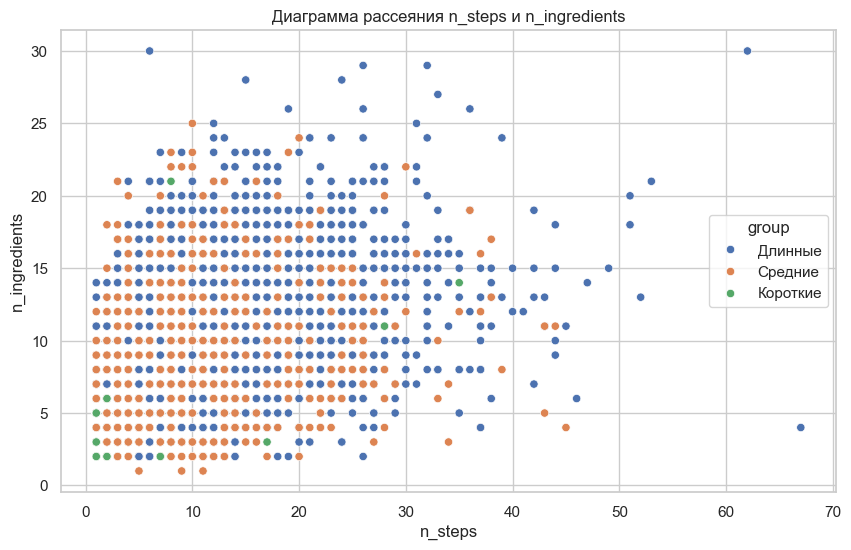

In [20]:
data_7 = recipes[['n_steps', 'n_ingredients']]

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='group')

plt.title('Диаграмма рассеяния n_steps и n_ingredients')


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

In [21]:
merged = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')
merged_col = merged[['minutes', 'n_steps', 'n_ingredients', 'rating']]
matrix = merged_col.corr()

matrix

,minutes,n_steps,n_ingredients,rating
minutes,1.000000,0.030675,-0.006254,-0.025770
n_steps,0.030675,1.000000,0.293526,-0.019057
n_ingredients,-0.006254,0.293526,1.000000,0.003405
rating,-0.025770,-0.019057,0.003405,1.000000


Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

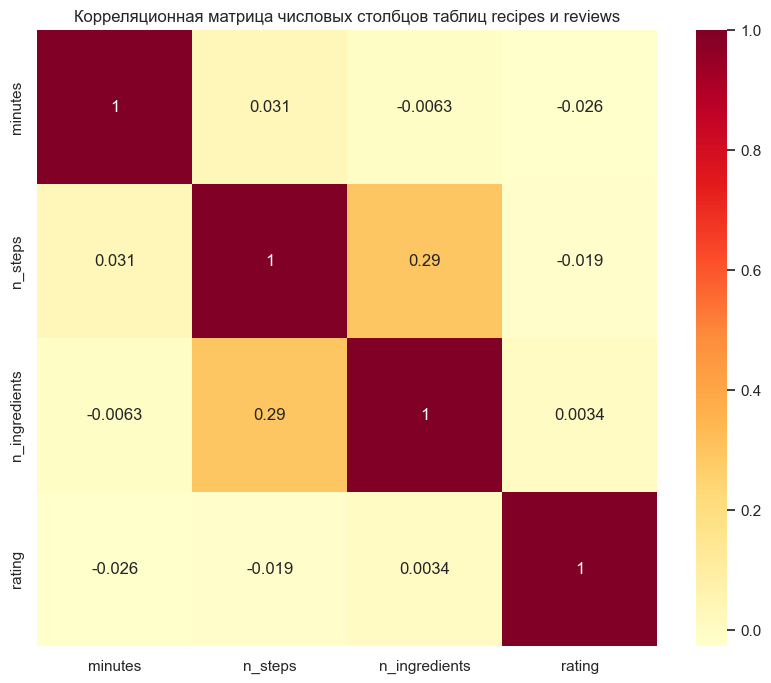

In [22]:
fig_8 = plt.figure(figsize=(10, 8))

sns.heatmap(matrix, annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')

In [23]:
merged_col

,minutes,n_steps,n_ingredients,rating
0,90,NaN,18.0,5
1,90,NaN,18.0,5
2,90,NaN,18.0,5
3,10,NaN,NaN,5
4,10,NaN,NaN,5
...,...,...,...,...
126691,60,NaN,NaN,5
126692,60,NaN,NaN,5
126693,60,NaN,NaN,5
126694,60,NaN,NaN,5


In [24]:
new_x

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', length=1095, freq='D')